**Connect google drive**

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Wed Apr 14 11:02:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/yolov3_custom
!dir

/content/drive/MyDrive/yolov3_custom
darknet  images  yolov3


**1) Clone the Darknet**



In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14751, done.
remote: Total 14751 (delta 0), reused 0 (delta 0), pack-reused 14751
Receiving objects: 100% (14751/14751), 13.31 MiB | 7.31 MiB/s, done.
Resolving deltas: 100% (10031/10031), done.
Checking out files: 100% (2023/2023), done.


**2) Compile Darknet using Nvidia GPU**


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/drive/MyDrive/yolov3_custom/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~

**3) Configure Darknet network for training YOLO V3**

In [ ]:
%cd darknet

/content/drive/MyDrive/yolov3_custom/darknet


In [ ]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [ ]:
# Create folder on google drive so that we can save there the weights
!mkdir "/content/drive/MyDrive/yolov3"

In [ ]:
!echo "Mask" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /content/drive/MyDrive/yolov3' > data/obj.data
!mkdir data/obj

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-04-13 21:33:45--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  65.9MB/s    in 2.4s    

2021-04-13 21:33:47 (65.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [ ]:
!unzip /content/drive/MyDrive/yolov3_custom/yolov3/BrainTum.zip -d data/obj

Archive:  /content/drive/MyDrive/yolov3_custom/yolov3/BrainTum.zip
  inflating: data/obj/classes.txt    
  inflating: data/obj/Y1.jpg         
  inflating: data/obj/Y1.txt         
  inflating: data/obj/Y10.jpg        
  inflating: data/obj/Y10.txt        
  inflating: data/obj/Y100.JPG       
  inflating: data/obj/Y100.txt       
  inflating: data/obj/Y101.jpg       
  inflating: data/obj/Y101.txt       
  inflating: data/obj/Y102.jpg       
 extracting: data/obj/Y102.txt       
  inflating: data/obj/Y103.jpg       
  inflating: data/obj/Y103.txt       
  inflating: data/obj/Y104.jpg       
  inflating: data/obj/Y104.txt       
  inflating: data/obj/Y105.jpg       
  inflating: data/obj/Y105.txt       
  inflating: data/obj/Y106.jpg       
 extracting: data/obj/Y106.txt       
  inflating: data/obj/Y107.jpg       
 extracting: data/obj/Y107.txt       
  inflating: data/obj/Y108.jpg       
 extracting: data/obj/Y108.txt       
  inflating: data/obj/Y109.JPG       
 extracting: data/obj

In [ ]:
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

dog

[]
person

[]
cat

[]
tv

[]
car

[]
meatballs

[]
marinara sauce

[]
tomato soup

[]
chicken noodle soup

[]
french onion soup

[]
chicken breast

[]
ribs

[]
pulled pork

[]
hamburger

[]
cavity

[]
tumor

[]
15 0.291667 0.490826 0.361111 0.311927

['15', '0.291667', '0.490826', '0.361111', '0.311927']
1 data/obj/Y1.txt
0 0.291667 0.490826 0.361111 0.311927
15 0.302778 0.490826 0.383333 0.311927

['15', '0.302778', '0.490826', '0.383333', '0.311927']
1 data/obj/Y1.txt
0 0.302778 0.490826 0.383333 0.311927
15 0.700627 0.522222 0.260188 0.227778

['15', '0.700627', '0.522222', '0.260188', '0.227778']
2 data/obj/Y10.txt
0 0.700627 0.522222 0.260188 0.227778
15 0.710801 0.738506 0.341463 0.350575

['15', '0.710801', '0.738506', '0.341463', '0.350575']
3 data/obj/Y100.txt
0 0.710801 0.738506 0.341463 0.350575
15 0.390000 0.391369 0.193333 0.211310

['15', '0.390000', '0.391369', '0.193333', '0.211310']
4 data/obj/Y101.txt
0 0.390000 0.391369 0.193333 0.211310
15 0.744463 0.686508 0.2

In [ ]:
import glob
images_list = glob.glob("data/obj/*.jpg")
print(images_list)

['data/obj/Y1.jpg', 'data/obj/Y10.jpg', 'data/obj/Y101.jpg', 'data/obj/Y102.jpg', 'data/obj/Y103.jpg', 'data/obj/Y104.jpg', 'data/obj/Y105.jpg', 'data/obj/Y106.jpg', 'data/obj/Y107.jpg', 'data/obj/Y108.jpg', 'data/obj/Y11.jpg', 'data/obj/Y12.jpg', 'data/obj/Y13.jpg', 'data/obj/Y14.jpg', 'data/obj/Y15.jpg', 'data/obj/Y153.jpg', 'data/obj/Y154.jpg', 'data/obj/Y162.jpg', 'data/obj/Y168.jpg', 'data/obj/Y169.jpg', 'data/obj/Y17.jpg', 'data/obj/Y2.jpg', 'data/obj/Y20.jpg', 'data/obj/Y21.jpg', 'data/obj/Y22.jpg', 'data/obj/Y24.jpg', 'data/obj/Y25.jpg', 'data/obj/Y26.jpg', 'data/obj/Y27.jpg', 'data/obj/Y28.jpg', 'data/obj/Y29.jpg', 'data/obj/Y3.jpg', 'data/obj/Y30.jpg', 'data/obj/Y31.jpg', 'data/obj/Y32.jpg', 'data/obj/Y33.jpg', 'data/obj/Y34.jpg', 'data/obj/Y35.jpg', 'data/obj/Y37.jpg', 'data/obj/Y38.jpg', 'data/obj/Y39.jpg', 'data/obj/Y4.jpg', 'data/obj/Y41.jpg', 'data/obj/Y42.jpg', 'data/obj/Y46.jpg', 'data/obj/Y51.jpg', 'data/obj/Y52.jpg', 'data/obj/Y53.jpg', 'data/obj/Y54.jpg', 'data/obj/

In [ ]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

**6) Start the training**

In [ ]:
!dir

3rdparty	darknet			image_yolov4.sh        README.md
backup		darknet53.conv.74	include		       results
build		DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
build.ps1	darknet_images.py	LICENSE		       src
build.sh	darknet.py		Makefile	       vcpkg.json
cfg		darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cmake		data			net_cam_v4.sh	       video_yolov4.sh
CMakeLists.txt	image_yolov3.sh		obj


In [ ]:
# Start the training
!chmod +x ./darknet
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show 

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.871435), count: 2, class_loss = 0.000000, iou_loss = 0.019212, total_loss = 0.019213 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.901476), count: 2, class_loss = 0.000302, iou_loss = 0.022393, total_loss = 0.022695 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 170694, rewritten_bbox = 1.083811 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.896149), count: 1, class_loss = 0.000001, iou_loss = 0.012087, total_loss = 0.012088 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.899476), count: 3, class_loss = 0.002972, iou_loss = 0.029510, total_loss = 0.032482 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.0

In [ ]:
#!dir
#Download models
from google.colab import files
files.download(f'/content/drive/MyDrive/yolov3/yolov3_training_last.weights') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

! wget "https://pjreddie.com/media/files/yolov3.weights"

--2021-04-13 23:03:28--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  80.1MB/s    in 3.0s    

2021-04-13 23:03:31 (80.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
%cd /content/drive/MyDrive/yolov3_custom/darknet

/content/drive/MyDrive/yolov3_custom/darknet


### **Testing model**

0
[[0]]


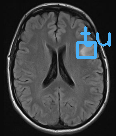

0
0
[[1]]


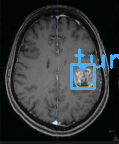

0
[[0]]


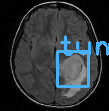

0
[[0]]


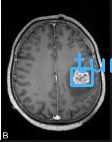

0
[[0]]


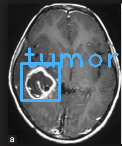

()


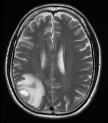

0
[[0]]


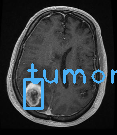

In [ ]:
import cv2

import numpy as np
import glob
import random


# Load Yolo
net = cv2.dnn.readNet("/content/drive/MyDrive/yolov3/yolov3_training_last.weights", "/content/drive/MyDrive/yolov3_custom/darknet/cfg/yolov3_testing.cfg")

# Name custom object
classes = ["tumor"]

# Images path
images_path = glob.glob(r"/content/drive/MyDrive/SSD_Tumor/test_images/*.JPG")



layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Insert here the path of your images
random.shuffle(images_path)
# loop through all the images
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 5), font, 2, color, 2)


    from google.colab.patches import cv2_imshow
    cv2_imshow (img)
    key = cv2.waitKey(0)

cv2.destroyAllWindows()